<a href="https://colab.research.google.com/github/rohit3171999/Landslide-Prediction-Major-Project-/blob/main/Landslide_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
dt=pd.read_csv('data_landslide.csv')

In [20]:
dt.head()

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature,Target
0,26.00,14,120,852,48.19,12.85,0
1,24.01,36,58,782,46.04,16.59,1
2,23.47,22,34,2564,35.99,22.39,1
3,14.49,36,85,12543,27.62,28.56,1
4,35.11,27,1582,18523,26.53,32.68,0


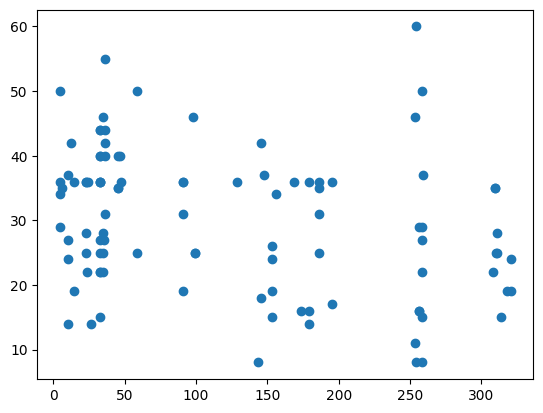

In [21]:
plt.scatter(dt['Rainfall (mm)'],dt['Slope Angle (Degree)'])

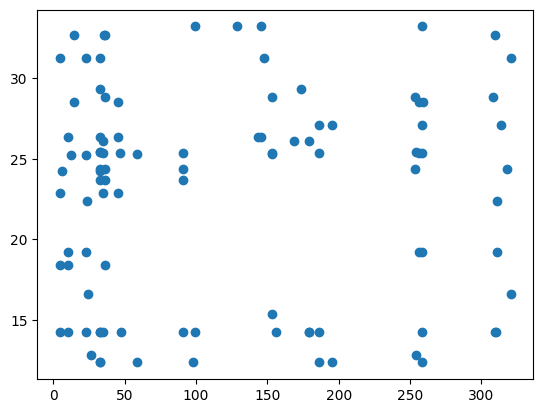

In [22]:
plt.scatter(dt['Rainfall (mm)'],dt['Temperature'])

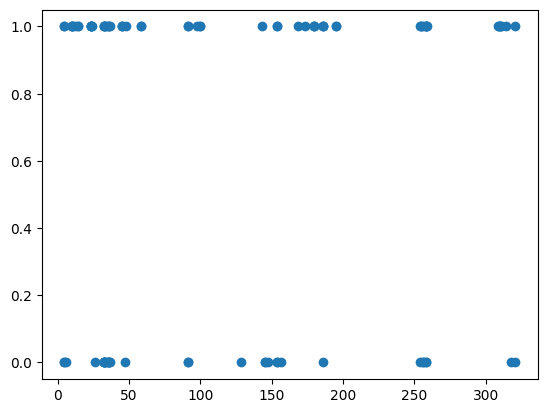

In [23]:
plt.scatter(dt['Rainfall (mm)'],dt['Target'])

In [24]:
import pickle
from flask import Flask, request, render_template

In [25]:
## seperating target rows from dataset
X=dt.iloc[:,:-1]
Y=dt['Target']

In [26]:
X


,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
0,26.00,14,120,852,48.19,12.85
1,24.01,36,58,782,46.04,16.59
2,23.47,22,34,2564,35.99,22.39
3,14.49,36,85,12543,27.62,28.56
4,35.11,27,1582,18523,26.53,32.68
...,...,...,...,...,...,...
95,32.97,27,48,17568,47.25,24.36
96,23.12,36,251,500,64.25,14.23
97,258.22,22,321,36544,58.25,25.36
98,153.44,15,44,24563,45.78,15.36


In [27]:
Y

0     0
1     1
2     1
3     1
4     0
     ..
95    0
96    1
97    1
98    1
99    1
Name: Target, Length: 100, dtype: int64

In [28]:
#training dataset size is 80%
#testing dataset size is 20%
# using random state beacuse stop choosing random samples of X_train
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.2, random_state=10)

In [29]:
X_train

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
90,4.54,50,321,25123,58.36,31.25
70,256.24,16,48,25369,25.33,28.56
50,34.98,22,258,18563,63.45,25.36
44,309.25,35,123,14632,56.23,14.26
76,4.54,34,85,25123,74.56,22.91
...,...,...,...,...,...,...
89,34.98,46,251,14526,45.36,14.23
28,156.22,34,165,16548,54.00,14.23
64,99.56,25,258,13156,47.25,33.23
15,32.97,44,44,14563,72.61,31.25


In [33]:
len(X_train)

80

In [34]:
len(X_test)

20

In [30]:
X_test

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
19,143.21,8,96,25413,47.25,26.36
14,32.30,40,321,753,40.62,25.45
43,256.24,29,165,2500,58.00,25.36
37,99.56,25,248,18523,58.25,14.26
66,195.25,36,159,19125,24.36,27.12
3,14.49,36,85,12543,27.62,28.56
79,32.37,44,321,19125,25.66,23.67
41,320.56,24,149,7235,69.55,31.25
38,36.25,55,156,19125,24.36,23.67
68,320.56,19,201,158962,45.85,16.59


In [31]:
X_train

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
90,4.54,50,321,25123,58.36,31.25
70,256.24,16,48,25369,25.33,28.56
50,34.98,22,258,18563,63.45,25.36
44,309.25,35,123,14632,56.23,14.26
76,4.54,34,85,25123,74.56,22.91
...,...,...,...,...,...,...
89,34.98,46,251,14526,45.36,14.23
28,156.22,34,165,16548,54.00,14.23
64,99.56,25,258,13156,47.25,33.23
15,32.97,44,44,14563,72.61,31.25


In [32]:
len(X_train)

80

*CLASSIFIER*

In [35]:
dtc= DecisionTreeClassifier()

In [36]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
dtc.score(X_train, Y_train)

1.0

In [38]:
dtc_pred=dtc.predict(X_test)

In [39]:
dtc_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [40]:
dtc

DecisionTreeClassifier()

In [41]:
dtc= DecisionTreeClassifier( criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=10,
    max_leaf_nodes=5)
dtc.fit(X_train, Y_train)
dtc_pred=dtc.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, dtc_pred)*100)

The Accuracy is 55.00000000000001


In [42]:
#this is on default values
dtc= DecisionTreeClassifier( criterion='gini', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None, 
                            ccp_alpha=0.0)
dtc.fit(X_train, Y_train)
dtc_pred=dtc.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, dtc_pred)*100)

The Accuracy is 55.00000000000001
